#  Question 5

In [318]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [319]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
import seaborn as sns

In [314]:
from ift6758.visualizations.simple_visualizations import simple_visualisation_1,simple_visualisation_1_percentage, rinkSideMissingValues, shootsDistance, simple_visualisation_combination, simple_visualisation_distance, simple_visualisation_goalRation

# Question 5-1 : 
Produce a figure comparing the shot types over all teams (i.e. just aggregate all of the shots), in a season of your choosing. Overlay the number of goals overtop the number of shots. What appears to be the most dangerous type of shot? The most common type of shot? Why did you choose this figure?

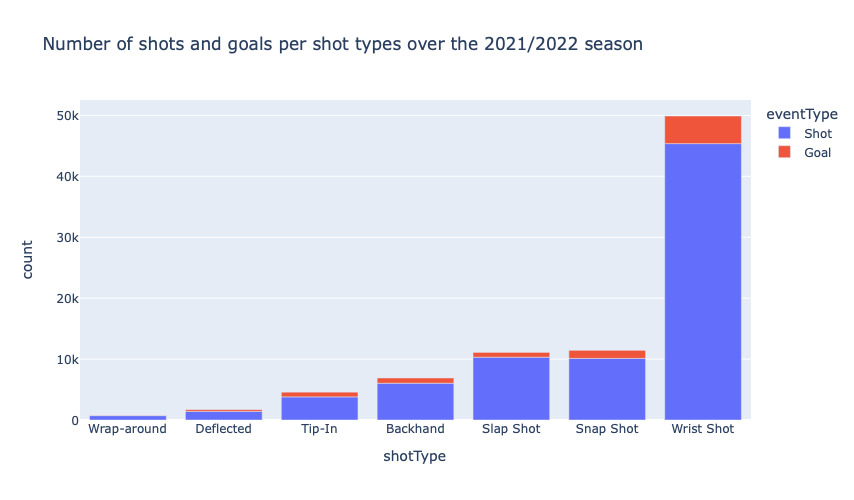

In [327]:
df = simple_visualisation_1('./2021finalDataset.csv')
fig = px.bar(df, x="shotType", y="count", color="eventType",  width=900, height=500,title='Number of shots and goals per shot types over the 2021/2022 season')
fig.update_layout( xaxis={'categoryorder':'array', 'categoryarray':['Wrap-around','Deflected',
                                                                    'Tip-In','Backhand','Slap Shot', 'Snap Shot','Wrist Shot']})
fig.show()
fig.write_html("fig1.html")

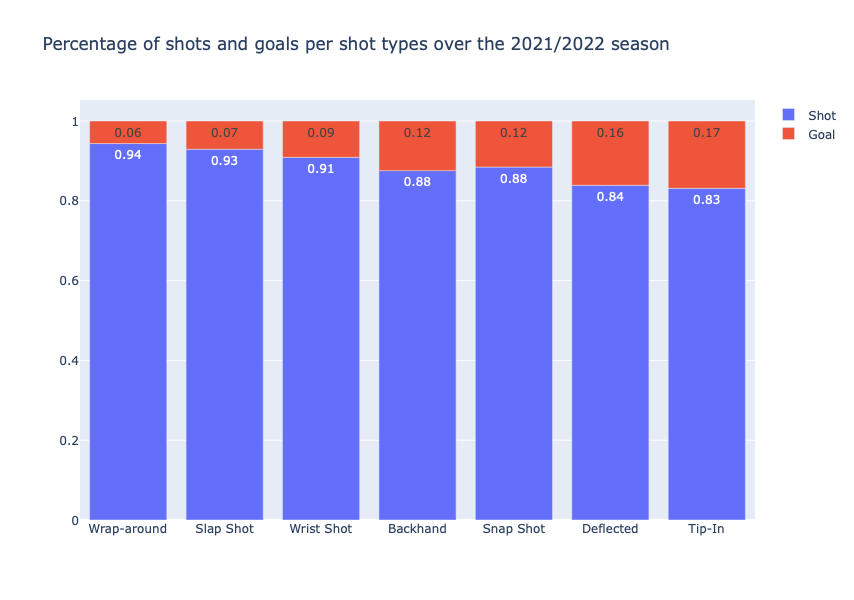

In [328]:
df = simple_visualisation_1_percentage('./2021finalDataset.csv')
fig = go.Figure()
fig.add_bar(x=df['shotType'],y=df['Shot'], name ='Shot', text=np.round(df['Shot'],2))
fig.add_bar(x=df['shotType'],y=df['Goal'], name ='Goal', text=np.round(df['Goal'],2), textposition='inside')
fig.update_layout(barmode="relative",    width=950,
    height=600, xaxis={'categoryorder':'array', 'categoryarray':['Wrap-around','Slap Shot', 'Wrist Shot','Backhand', 'Snap Shot',
                                                                 'Deflected', 'Tip-In' ]}, 
                  title_text='Percentage of shots and goals per shot types over the 2021/2022 season')
fig.show()
fig.write_html("fig2.html")

# Question 5-2 : 
What is the relationship between the distance a shot was taken and the chance it was a goal? Produce a figure for each season between 2018-19 to 2020-21 to answer this, and add it to your blog post along with a couple of sentences describing your figure. Has there been much change over the past three seasons? Why did you choose this figure?

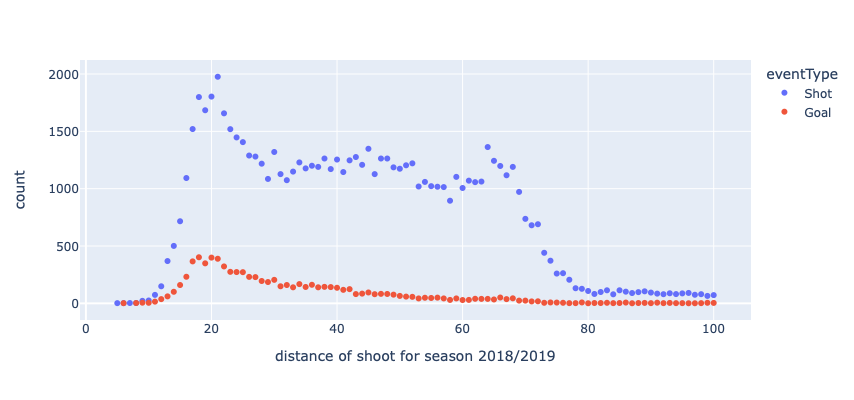

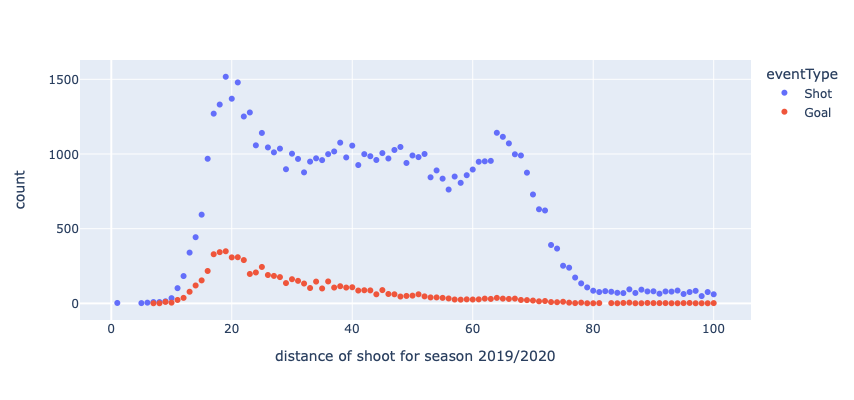

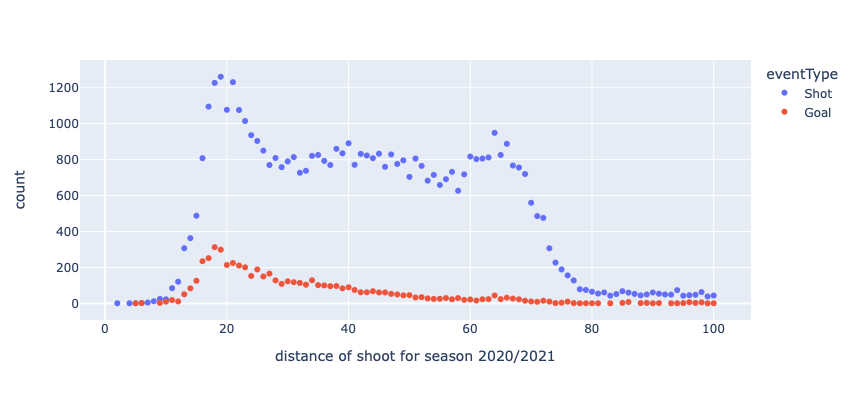

In [337]:
df2018 = PlotDistance('./2018finalDataset.csv')
df2019 = PlotDistance('./2019finalDataset.csv')
df2020 = PlotDistance('./2020finalDataset.csv')
fig = px.scatter(df2018, x="shootDistance", y="count", color="eventType",)
fig.update_layout(
                   xaxis_title='distance of shoot for season 2018/2019 ',
                   width=900,
                   height=400,)
fig.show()
fig.write_html("fig3.html")
fig = px.scatter(df2019, x="shootDistance", y="count", color="eventType",)
fig.update_layout(
                   xaxis_title='distance of shoot for season 2019/2020 ',
                   width=900,
                   height=400,)
fig.show()
fig.write_html("fig4.html")
fig = px.scatter(df2020, x="shootDistance", y="count", color="eventType",)
fig.update_layout(
                   xaxis_title='distance of shoot for season 2020/2021 ',
                   width=900,
                   height=400,)
fig.show()
fig.write_html("fig5.html")

In [254]:
df2018_plot2

eventType,shootDistance,Goal,Shot
0,5.0,0.000000,1.000000
1,6.0,0.500000,0.500000
2,7.0,0.000000,1.000000
3,8.0,0.500000,0.500000
4,9.0,0.214286,0.785714
...,...,...,...
190,195.0,0.090909,0.909091
191,196.0,0.200000,0.800000
192,197.0,0.375000,0.625000
193,198.0,0.250000,0.750000


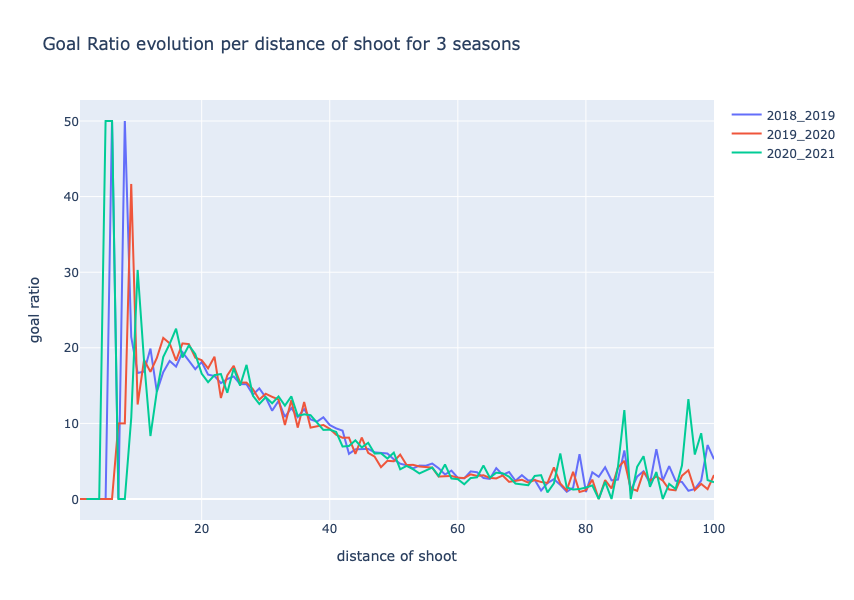

In [330]:
df2018_plot2 = simple_visualisation_goalRation('./2018finalDataset.csv')
df2019_plot2 = simple_visualisation_goalRation('./2019finalDataset.csv')
df2020_plot2 = simple_visualisation_goalRation('./2020finalDataset.csv')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2018_plot2['shootDistance'], y=round(df2018_plot2['Goal']*100,2),
                    mode='lines',
                    name='2018_2019'))
fig.add_trace(go.Scatter(x=df2019_plot2['shootDistance'], y=round(df2019_plot2['Goal']*100,2),
                    mode='lines',
                    name='2019_2020'))
fig.add_trace(go.Scatter(x=df2020_plot2['shootDistance'], y=round(df2020_plot2['Goal']*100,2),
                    mode='lines', name='2020_2021'))
fig.update_layout(title='Goal Ratio evolution per distance of shoot for 3 seasons',
                   xaxis_title='distance of shoot',
                   width=900,
                   height=600,
                   yaxis_title='goal ratio')
fig.show()
fig.write_html("fig6.html")

# Question t-3 :
Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?

In [332]:
df= simple_visualisation_combination('./2018finalDataset.csv')

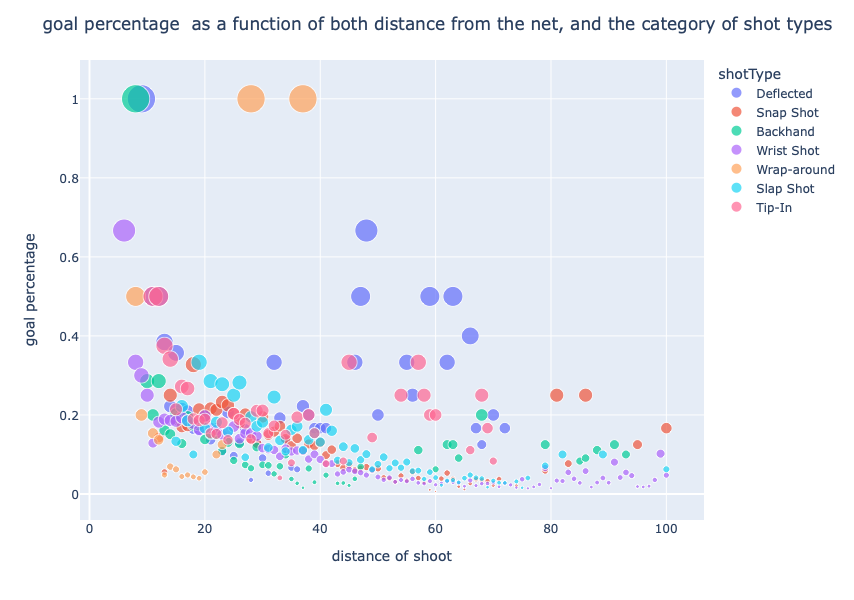

In [333]:
fig = px.scatter(df, x="shootDistance", y="Goal", color="shotType",
                 size='Goal')
fig.update_layout(title='goal percentage  as a function of both distance from the net, and the category of shot types',
                   xaxis_title='distance of shoot',
                   width=900,
                   height=600,
                   yaxis_title='goal percentage')
fig.show()
fig.write_html("fig7.html")

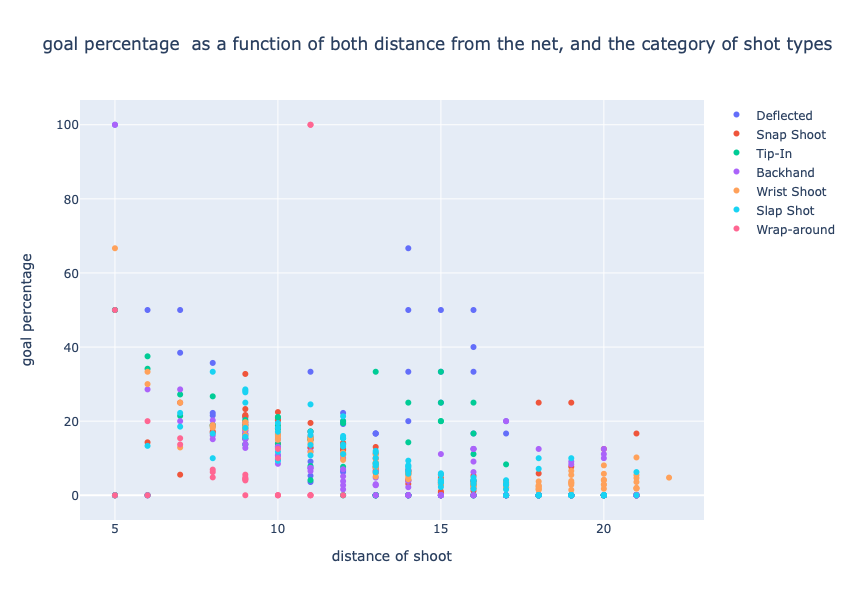

In [334]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Deflected']*100,
                    mode='markers',
                    name='Deflected'))
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Snap Shot']*100,
                    mode='markers',
                    name='Snap Shoot'))
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Tip-In']*100,
                    mode='markers', name='Tip-In'))

fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Backhand']*100,
                    mode='markers',
                    name='Backhand'))
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Wrist Shot']*100,
                    mode='markers',
                    name='Wrist Shoot'))
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Slap Shot']*100,
                    mode='markers', name='Slap Shot'))
fig.add_trace(go.Scatter(x=df['shootDistance'], y=df['Goal'][df['shotType']=='Wrap-around']*100,
                    mode='markers', name='Wrap-around'))
fig.update_layout(title='goal percentage  as a function of both distance from the net, and the category of shot types',
                   xaxis_title='distance of shoot',
                   width=900,
                   height=600,
                   yaxis_title='goal percentage')
fig.show()
fig.write_html("fig8.html")

In [292]:
df= simple_visualisation_combination('./2018finalDataset.csv')

In [304]:
df = df[['distanceCluster',	'shootDistance',	'shotType',	'Goal']]

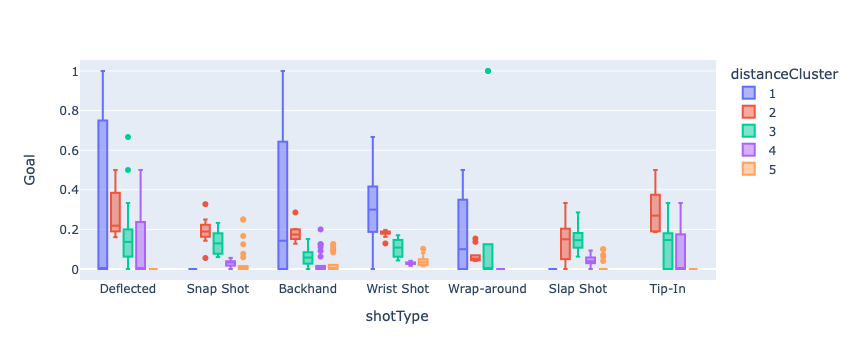

In [335]:
fig = px.box(df, x="shotType", y="Goal", color="distanceCluster")
fig.show()
fig.write_html("fig9.html")

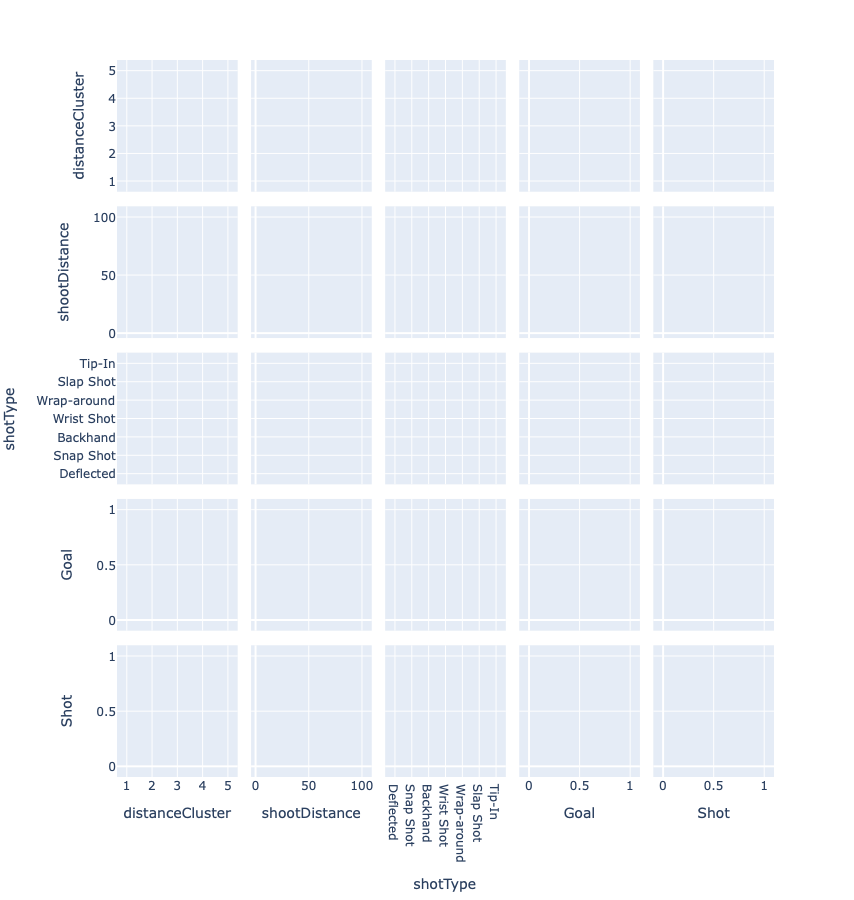

In [336]:
fig = px.scatter_matrix(df)
fig.update_layout(
                   width=900,
                   height=900)
fig.show()
fig.write_html("fig10.html")